In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("glassdoor_jobs.csv")

## Exploring Dataset

In [3]:
df.shape

(956, 15)

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [6]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [8]:
df.isnull().any()

Unnamed: 0           False
Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name         False
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
dtype: bool

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


## Exploratory Data Analysis and Data Cleaning
.Plotting bargraphs and countplots for numerical and categorical
features respectively.

.Removing unwanted columns

.Handling NaN/missing values

.Removing unwanted alphabet/special characters from the features


In [10]:
# Removing unwanted column
print('Shape before removing: {} '.format(df.shape))
df.drop(labels=['Unnamed: 0'],axis='columns',inplace=True)
print('Shape after removing: {} '.format(df.shape))

Shape before removing: (956, 15) 
Shape after removing: (956, 14) 


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


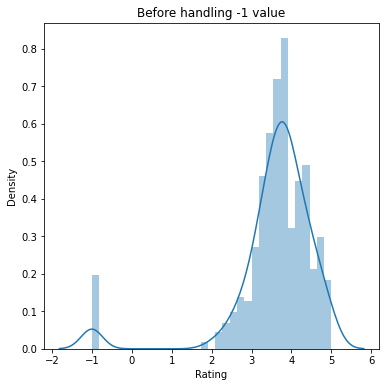

In [12]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p= plt.title('Before handling -1 value')

In [13]:
## Note: Since the Rating feature follows the Gaussian/Normal Distribution, we'll replace -1 values with mean of the distribution.

In [14]:
df_copy = df.copy(deep = True)
df_copy['Rating'] = df_copy['Rating'].replace(-1,np.NaN)

In [15]:
df_copy['Rating'] = df_copy['Rating'].fillna(df_copy['Rating'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


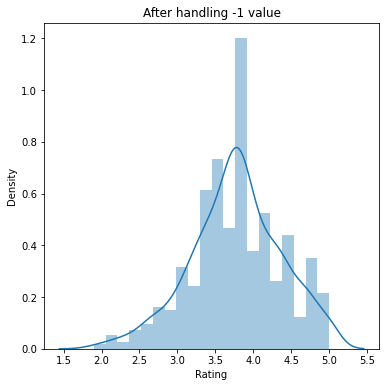

In [16]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df_copy['Rating'])
p = plt.title('After handling -1 value')

In [17]:
# Outliers in Rating

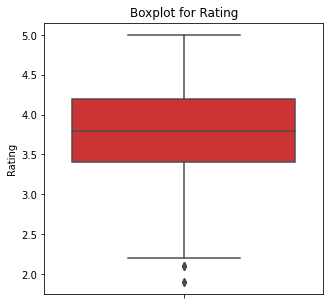

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating',data=df_copy,orient='v',palette='Set1')
p = plt.title('Boxplot for Rating')
p = plt.ylabel('Rating')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


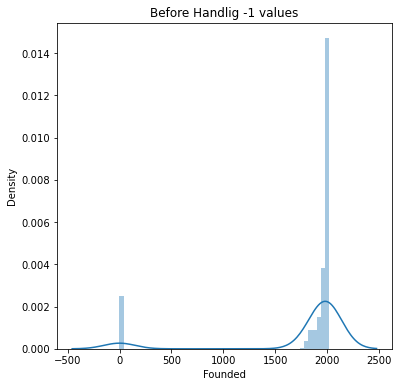

In [19]:
# Visualizing Founded Column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df_copy['Founded'])
p = plt.title('Before Handlig -1 values')

In [20]:
## Note: Since Founded feature does not follow Gaussian/Normal distribution but is Right-Skewed graph, we'll replacing the -1 values with median of the distribution.

In [21]:
df_copy['Founded'] = df_copy['Founded'].replace(-1,np.NaN)
df_copy['Founded'] = df_copy['Founded'].fillna(df_copy['Founded'].median())


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


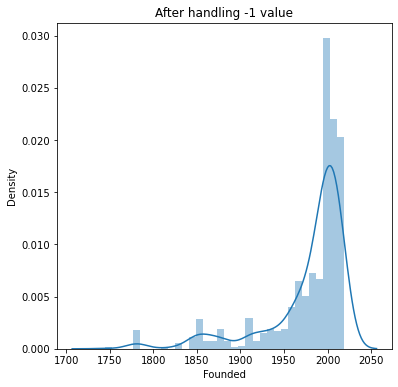

In [22]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df_copy['Founded'])
p = plt.title('After handling -1 value')

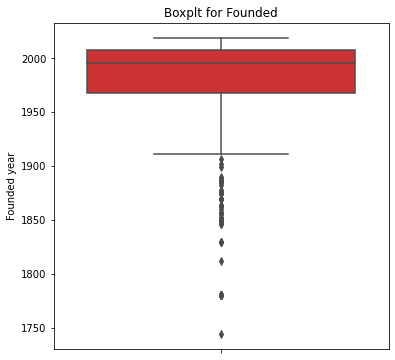

In [23]:
# Outliers in Founded
plt.figure(figsize=(6,6))
sns.boxplot(y='Founded',data=df_copy,orient = 'v',palette = 'Set1')
p = plt.title('Boxplt for Founded')
p = plt.ylabel('Founded year')

In [24]:
df_copy['Job Title'].value_counts().nlargest(20)

Data Scientist                   178
Data Engineer                     68
Senior Data Scientist             42
Data Analyst                      18
Senior Data Engineer              17
Business Intelligence Analyst     13
Senior Data Analyst               12
Lead Data Scientist                8
Data Science Manager               7
Principal Data Scientist           6
Marketing Data Analyst             6
Sr. Data Engineer                  6
Machine Learning Engineer          6
Analytics Manager                  5
Lead Data Engineer                 5
Data Engineer with R               4
Food Scientist - Developer         4
Analytics Manager - Data Mart      4
Big Data Engineer                  4
Medical Laboratory Scientist       4
Name: Job Title, dtype: int64

In [25]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'
    
df_copy['job_title'] = df_copy['Job Title'].apply(title_cleaner)
df_copy['job_title'].value_counts()
        

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: job_title, dtype: int64

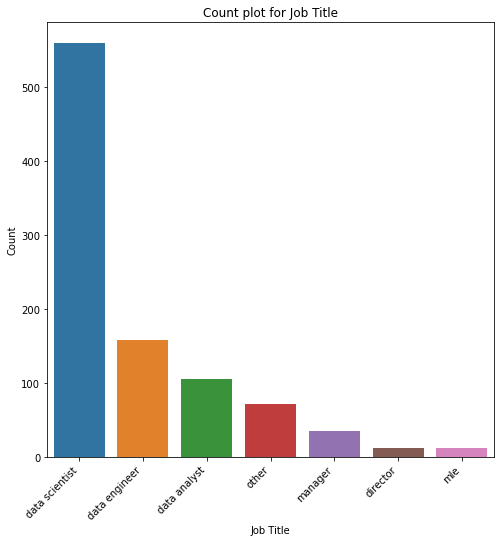

In [26]:
plt.figure(figsize = (8,8))
g = sns.countplot(x='job_title',data=df_copy, order = df_copy['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [27]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'
    
df_copy['job_seniority'] = df_copy['Job Title'].apply(title_seniority)
df_copy['job_seniority'].value_counts()

other    701
sr       252
jr         3
Name: job_seniority, dtype: int64

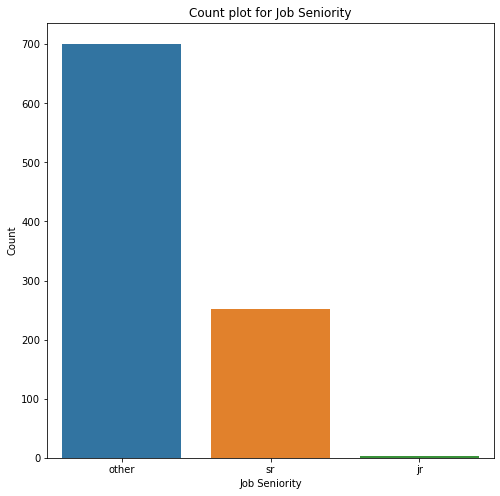

In [28]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_seniority', data=df_copy, order = df_copy['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [29]:
# Removing Job Title Column
df_copy.drop(labels=['Job Title'],axis=1,inplace = True)

In [30]:
# Cleaning Salary Estimate column
salary = df_copy['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [31]:
salary.value_counts()

-1                  214
$54K-$115K            6
$49K-$113K            6
$86K-$143K            6
$21-$34 Per Hour      6
                   ... 
$101K-$141K           1
$66K-$112K            1
$52K-$113K            1
$58K-$108K            1
$56K-$117K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [32]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [33]:
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [34]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [35]:
## Note: Converting per hour salaries to per year salaries (assuming 45 work hours per week and 52 working weeks), and removing employer_provided_salary from the salary array._

In [36]:
# Removing the string employer prvided salary from salary array
salary = salary.apply(lambda x : x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [37]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit,maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(minlimit)*45*52/1000)
    y = int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x,y)
salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0],x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [38]:
# Creating column of the salary i.e average of the range
df_copy['Salary'] = salary.apply(lambda x : x if type(x)==type(3.5) else (int(x.split("-")[0])+int(x.split("-")[1]))/2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


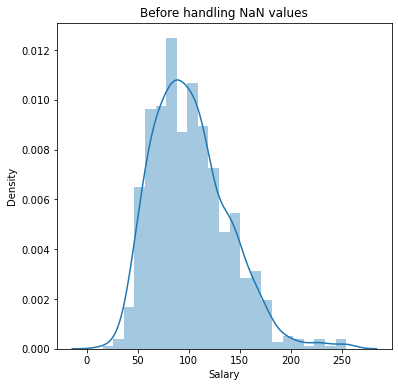

In [39]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df_copy['Salary'])
p = plt.title('Before handling NaN values')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


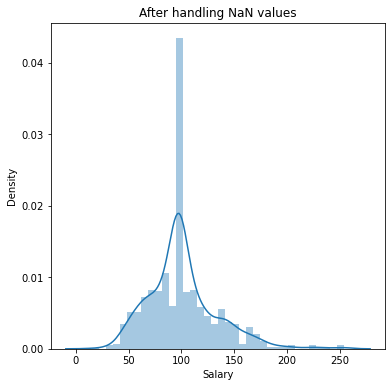

In [40]:
df_copy['Salary'] = df_copy['Salary'].fillna(df_copy['Salary'].median())
plt.figure(figsize=(6,6))
g = sns.distplot(a=df_copy['Salary'])
p = plt.title('After handling NaN values')

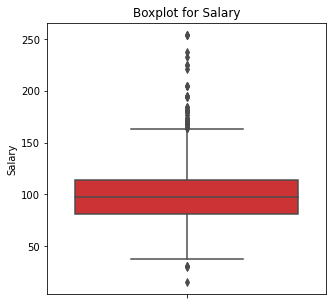

In [41]:
# Outliers in salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary',data=df_copy,orient='v',palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

In [42]:
# Cleaning Company Column Name
df_copy['Company Name'] = df_copy['Company Name'].apply(lambda x: x.split("\n")[0])

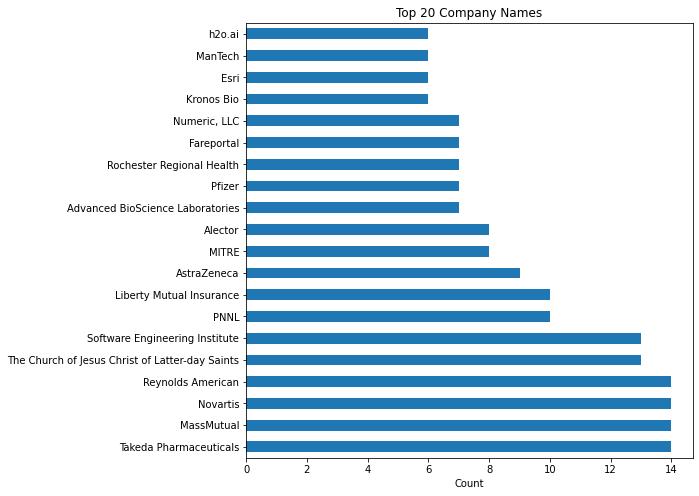

In [43]:
plt.figure(figsize=(8,8))
g = df_copy["Company Name"].value_counts().nlargest(20).plot(kind='barh')
p = plt.title('Top 20 Company Names')
p = plt.xlabel('Count')

In [44]:
df_copy['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [45]:
# Cleaning 'Size' column
df_copy['Size'] = df_copy['Size'].apply(lambda x: 'Unknown' if '-1' in x.lower() else x)

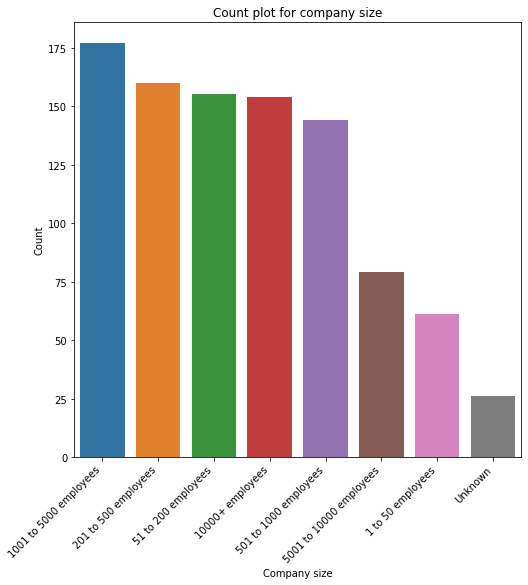

In [46]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size',data=df_copy,order = df_copy['Size'].value_counts().index)
p = plt.title('Count plot for company size')
p = plt.xlabel("Company size")
p = plt.ylabel("Count")
p = g.set_xticklabels(g.get_xticklabels(),rotation=45, horizontalalignment='right')

In [47]:
# Cleaning Type of ownership column
df_copy['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
-1                                 11
Unknown                            11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [48]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower())  or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
        return 'Other Organization'
    else:
        return text
df_copy['Type of ownership'] = df_copy['Type of ownership'].apply(ownership_simplifier)

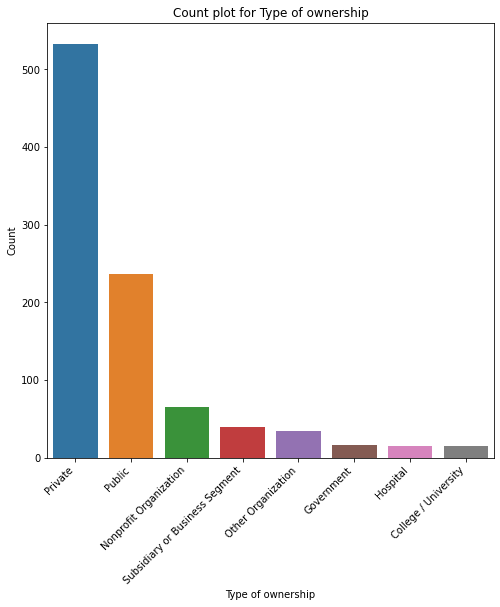

In [49]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df_copy, order = df_copy['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [50]:
# Cleaning Industry Column
df_copy['Industry'].value_counts()

Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
                                          ... 
Farm Support Services                        1
Auctions & Galleries                         1
Trucking                                     1
Accounting                                   1
Transportation Equipment Manufacturing       1
Name: Industry, Length: 63, dtype: int64

In [51]:
df_copy['Industry'] = df_copy['Industry'].apply(lambda x : 'Others' if x=='-1' else x)

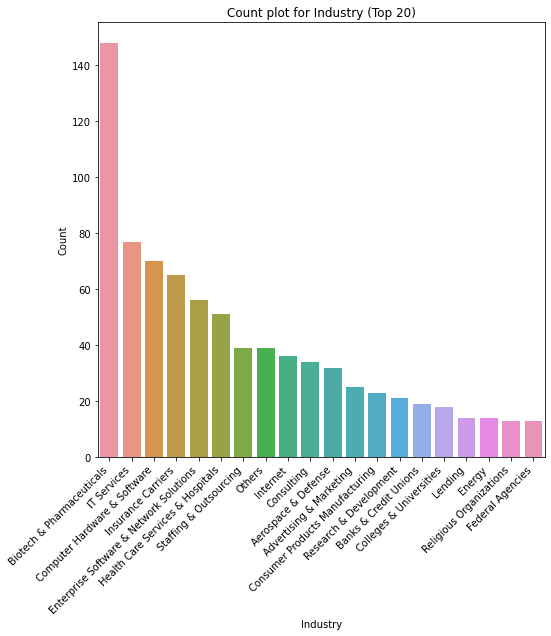

In [52]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df_copy, order = df_copy['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [53]:
# Cleaning 'Sector' columns
df_copy['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Non-Profit                             16
Retail                                 16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Real Estate                             8
Travel & Tourism                        8
Transportation & Logistics              8
Telecommunications                      6
Construction, Repair & Maintenance      4
Consumer Services                       4
Arts, Entertainment & Recreation        4
Mining & Metals                         3
Accounting & Legal                

In [54]:
df_copy['Sector'] = df_copy['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

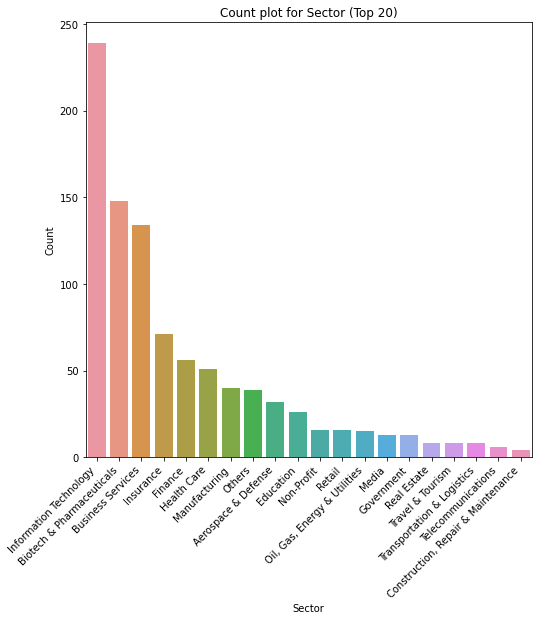

In [55]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df_copy, order = df_copy['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [56]:
# Cleaning Revenue column
df_copy['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [57]:
df_copy['Revenue'] = df_copy['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if x=='-1' else x)

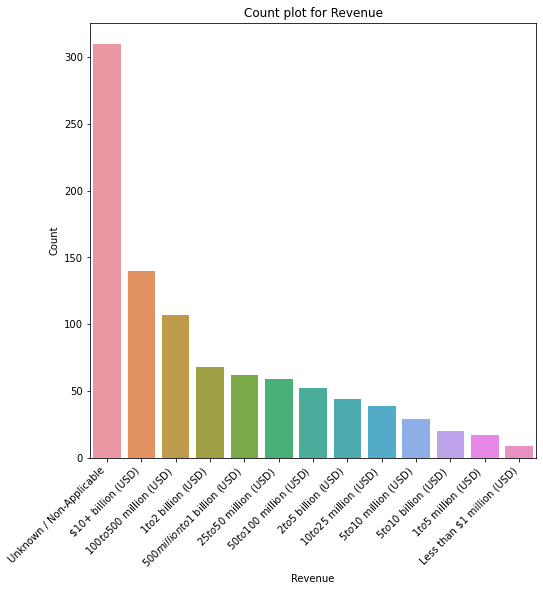

In [58]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df_copy, order = df_copy['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


In [59]:
# Cleaning 'Competitors' column
df_copy['Competitors'].value_counts()

-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Caterpillar, John Deere, CNH Industrial                                                           1
EmblemHealth, UnitedHealth Group, Aetna                                                           1
Nebraska Medicine, Children's Hospital & Medical Center, Methodist Health System - NE and IA      1
Cadence Design Systems, Synopsys, Altium Limited                                                  1


In [60]:
df_copy['Competitors'] = df_copy['Competitors'].apply(lambda x : len(x.split(',')) if x!='-1' else 0)

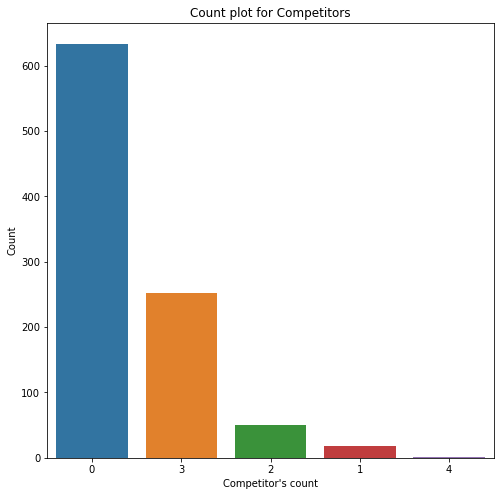

In [61]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df_copy, order = df_copy['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

In [62]:
# creating a column 'job_state'
df_copy['job_location'] = df_copy['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1])
print('Total number of unique locations: {}'.format(len(df_copy['job_location'].unique())))

Total number of unique locations: 46


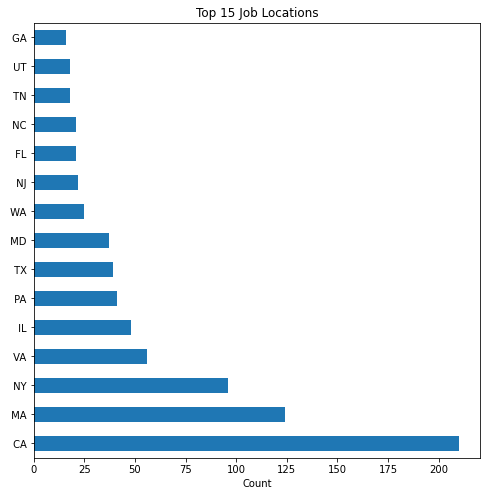

In [63]:
plt.figure(figsize=(8,8))
g = df_copy["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

In [64]:
df_copy.head(15)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,FL
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,other,76.5,WA
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,other,114.5,NY
5,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX","Dallas, TX",201 to 500 employees,2000.0,Public,Real Estate,Real Estate,$1 to $2 billion (USD),3,data scientist,other,95.0,TX
6,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008.0,Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,0,data scientist,other,73.5,MD
7,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,"San Jose, CA","Seattle, WA",201 to 500 employees,2005.0,Private,Consulting,Business Services,$25 to $50 million (USD),0,data scientist,other,114.0,CA
8,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health,"Rochester, NY","Rochester, NY",10000+ employees,2014.0,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),0,data scientist,other,61.0,NY
9,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>,"New York, NY","New York, NY",51 to 200 employees,2009.0,Private,Internet,Information Technology,$100 to $500 million (USD),2,data scientist,other,140.0,NY


In [65]:
df_copy.tail(15)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
941,$50K-$110K (Glassdoor est.),Q2 Solutions is a leading clinical trial labor...,2.900000,Q2 Solutions,"Marietta, GA","Morrisville, NC",1001 to 5000 employees,2015.0,Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,0,data scientist,sr,80.0,GA
942,$44K-$96K (Glassdoor est.),Q2 Solutions is a leading clinical trial labor...,2.900000,Q2 Solutions,"Ithaca, NY","Morrisville, NC",1001 to 5000 employees,2015.0,Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,0,data scientist,other,70.0,NY
943,Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",3.770933,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,1996.0,Private,Others,Others,Unknown / Non-Applicable,0,data scientist,other,120.0,MA
944,$61K-$119K (Glassdoor est.),IT - Data Engineer II\n\nThe Data Engineer II ...,3.400000,Arbella Insurance,"Quincy, MA","Quincy, MA",1001 to 5000 employees,1988.0,Private,Insurance Carriers,Insurance,$100 to $500 million (USD),0,data engineer,other,90.0,MA
945,$80K-$142K (Glassdoor est.),CK-12’s mission is to provide free access to o...,4.100000,CK-12 Foundation,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,2007.0,Private,K-12 Education,Education,Unknown / Non-Applicable,0,mle,other,111.0,CA
946,$99K-$178K (Glassdoor est.),Senior Data Analyst\n\nAbout us\n\n\nLife360 b...,3.900000,Life360,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2008.0,Public,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,0,data analyst,sr,138.5,CA
947,$37K-$100K (Glassdoor est.),"At MassMutual, we are passionate about helping...",3.600000,MassMutual,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851.0,Private,Insurance Carriers,Insurance,$10+ billion (USD),0,manager,other,68.5,MA
948,$62K-$113K (Glassdoor est.),Do you find data architecture exciting? Does b...,3.900000,Fivestars,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2011.0,Private,Internet,Information Technology,$100 to $500 million (USD),2,data engineer,other,87.5,CA
949,$86K-$137K (Glassdoor est.),IQVIA is the leading human data science compan...,3.600000,IQVIA,"Plymouth Meeting, PA","Durham, NC",10000+ employees,2017.0,Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),3,other,sr,111.5,PA
950,$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.900000,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830.0,Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),3,data scientist,other,84.5,MA


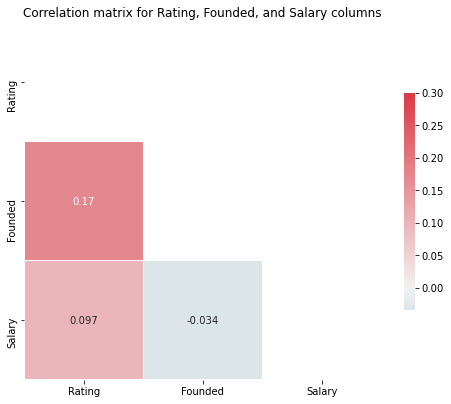

In [66]:
# Finding and plotting the correlation between numerical features
cmap = sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize = (8,8))
corr = df_copy[['Rating','Founded','Salary']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=np.bool))
g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

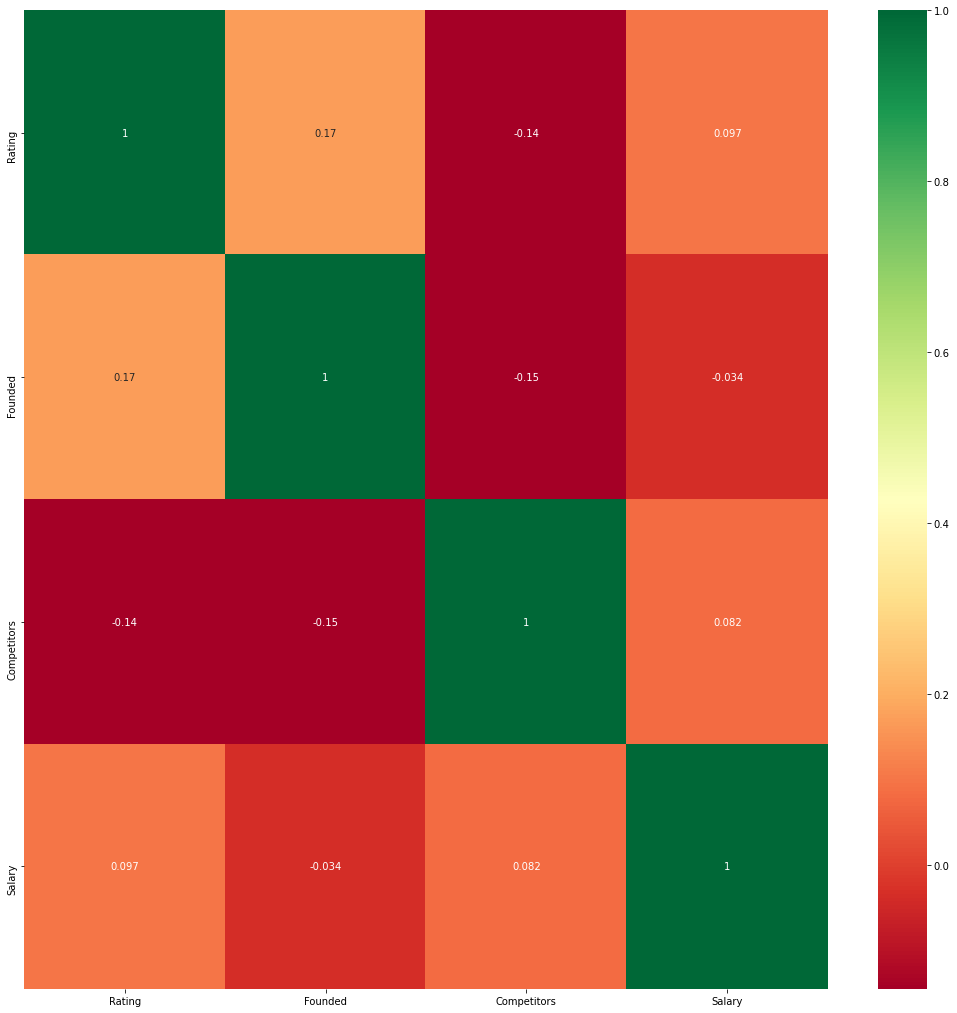

In [67]:
plt.figure(figsize = (18,18))
sns.heatmap(df_copy.corr(),annot = True , cmap = "RdYlGn")
plt.show()

In [68]:
## Insight: Rating-Founded columns have positive correlation, whereas Salary-Founded columns have negative correlation. Also since the correlation is not high amongst all these numerical features, there is no case of multicolliniearity.

## Feature Engineering
Creating new features from existing features

Trimming Columns

Handling ordinal and nominal categorical features

Feature Selection

Creating new features from existing features

Adding column of _job_inheadquarters

Adding columns of python, excel, sql, tableau jobs

In [69]:
#Creating Column for job in headquarters
df_copy['job_in_headquarters'] = df_copy.apply(lambda x: 1 if x['Location']==x['Headquarters'] else 0,axis=1)

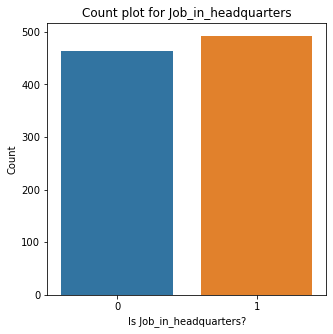

In [70]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df_copy)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel("Is Job_in_headquarters?")
p = plt.ylabel('Count')

In [71]:
df_copy.drop(labels=['Location'], axis=1, inplace=True)

In [72]:
# Creating columns of 'python, excel, sql, tableau' jobs
df_copy['python_job'] = df_copy['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df_copy['excel_job'] = df_copy['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df_copy['sql_job'] = df_copy['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df_copy['tableau_job'] = df_copy['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

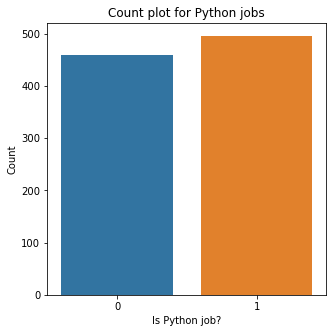

In [73]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=df_copy)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')


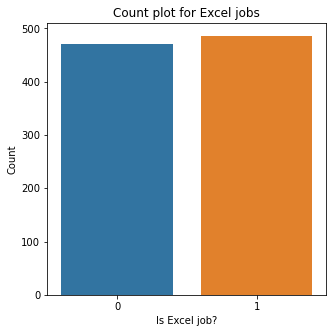

In [74]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=df_copy)
p = plt.title('Count plot for Excel jobs')
p = plt.xlabel("Is Excel job?")
p = plt.ylabel('Count')

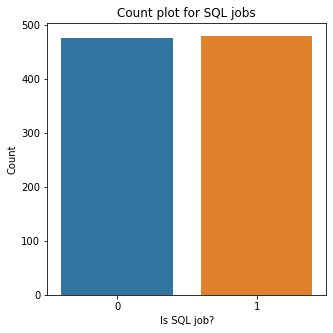

In [75]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=df_copy)
p = plt.title('Count plot for SQL jobs')
p = plt.xlabel("Is SQL job?")
p = plt.ylabel('Count')

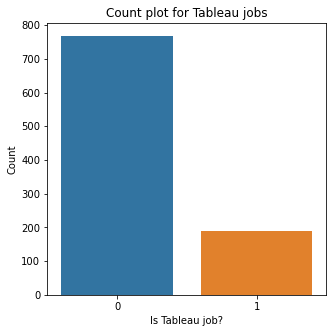

In [76]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=df_copy)
p = plt.title('Count plot for Tableau jobs')
p = plt.xlabel("Is Tableau job?")
p = plt.ylabel('Count')

In [77]:
df_copy.drop(labels=['Job Description'],axis=1,inplace=True) 

In [78]:
# Trimming Columns
# Features having more than 10 categories are trimmed so as to reduce the dimensionality.

In [79]:
# Trimming the 'Sector' column
# Taking top 9 sector and replacing remaininng by 'Others'
sector_list = list(df_copy['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
    if text not in sector_list:
        return 'Others'
    else:
        return text
df_copy['Sector'] = df_copy['Sector'].apply(sector_simplifier)

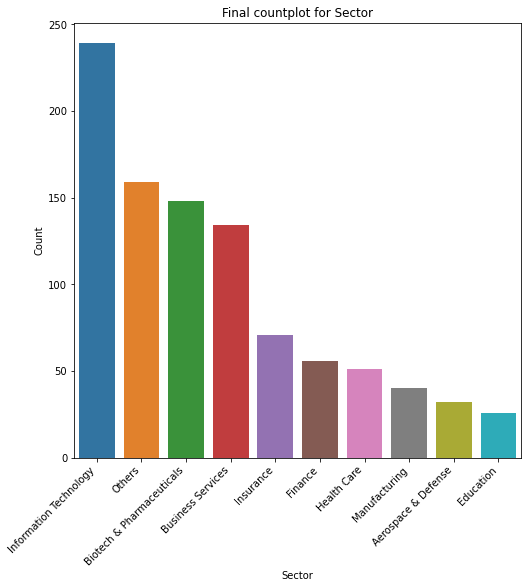

In [80]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df_copy, order = df_copy['Sector'].value_counts().index)
p = plt.title('Final countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [81]:
# Trimming the 'job_location' column
job_location_list = list(df_copy['job_location'].value_counts()[:9].index)
def job_location_simplifier(text):
      if text not in job_location_list:
        return 'Others'
      else:
        return text

df_copy['job_location'] = df_copy['job_location'].apply(job_location_simplifier)

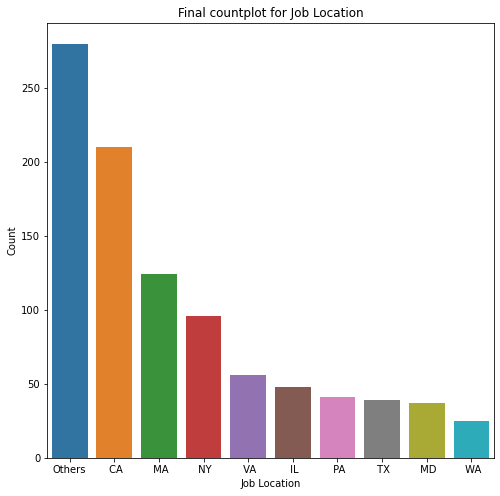

In [82]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=df_copy, order = df_copy['job_location'].value_counts().index)
p = plt.title('Final countplot for Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Count')


In [83]:
df_copy.drop(labels=['Salary Estimate','Company Name','Headquarters','Industry','job_location'],axis=1,inplace=True)

In [84]:
df_copy.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [85]:
# Renaming columns
df_copy.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

In [86]:
## • Handling ordinal categorical features
#Ordinal features are categorical variables that have some order associated with them (e.g. size, rating, remark, etc.)

In [87]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df_copy['company_size'] = df_copy['company_size'].map(size_map)

In [88]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df_copy['revenue'] = df_copy['revenue'].map(revenue_map)

In [89]:
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df_copy['job_seniority'] = df_copy['job_seniority'].map(job_seniority_map)

In [90]:
## • Handling nominal categorical features
# Nominal features are categorical variables that have no numerical importance (e.g. occupation, name, etc.)

In [91]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df_copy.shape))
df_copy = pd.get_dummies(columns=['type_of_ownership'],data=df_copy,prefix='ownership')
print('After: {}'.format(df_copy.shape))

Before: (956, 15)
After: (956, 22)


In [92]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df_copy.shape))
df_copy = pd.get_dummies(columns=['sector'],data=df_copy)
print('After: {}'.format(df_copy.shape))

Before: (956, 22)
After: (956, 31)


In [93]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df_copy.shape))
df_copy = pd.get_dummies(columns=['job_title'],data=df_copy)
print('After: {}'.format(df_copy.shape))

Before: (956, 31)
After: (956, 37)


In [94]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df_copy.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

In [95]:
## • Feature Selection
#_Selecting features based on information gain (mutual_info_regression) and correlation matrix_

In [96]:
x = df_copy.drop('salary',axis=1)
y = df_copy['salary']

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [98]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000001B41FB7BF70>)

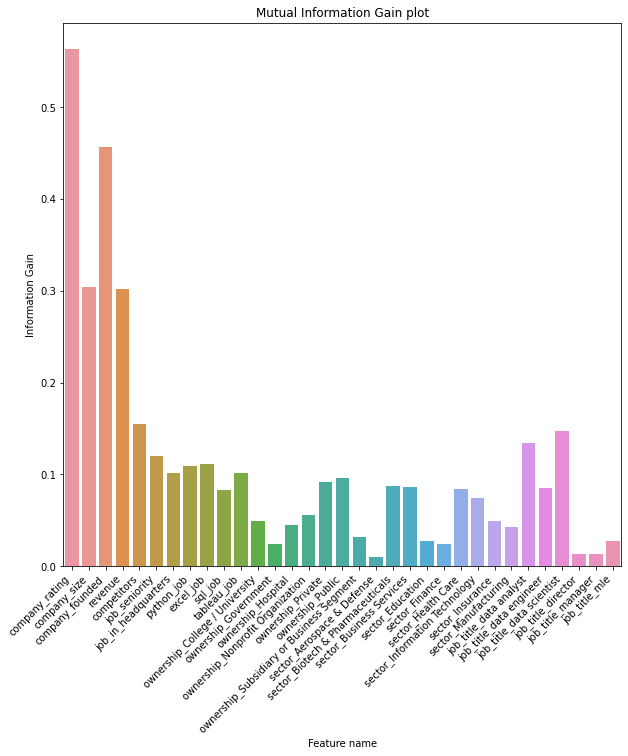

In [99]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=x.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

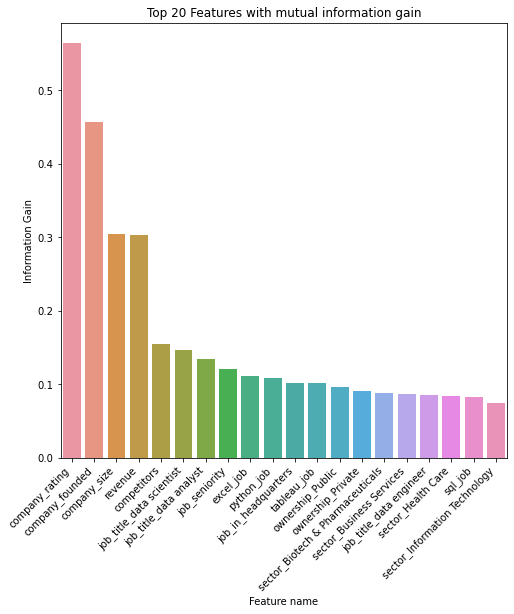

In [100]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=x.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

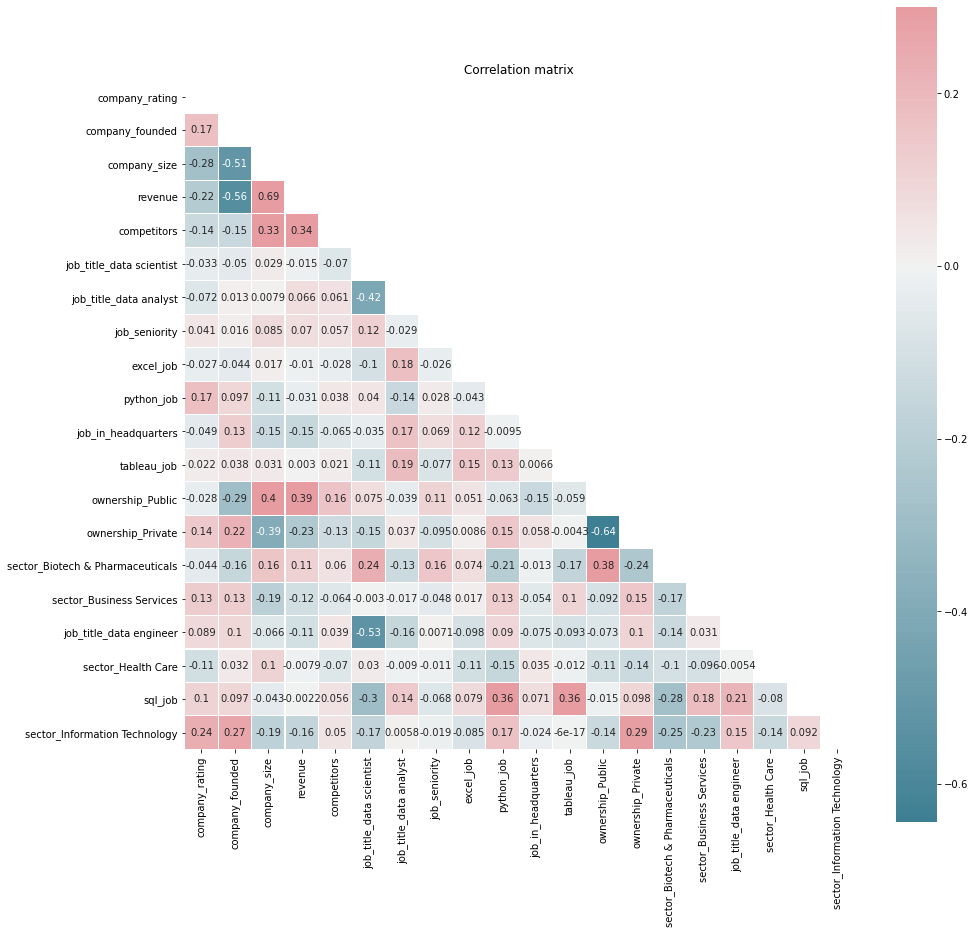

In [101]:
# Finding and plotting the correlation matrix for top20 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = x[top20_feature.index].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

Insight: From the correlation matrix, it is evident that features (ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated. Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features

In [102]:
x = x[top20_feature.index]
x.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)

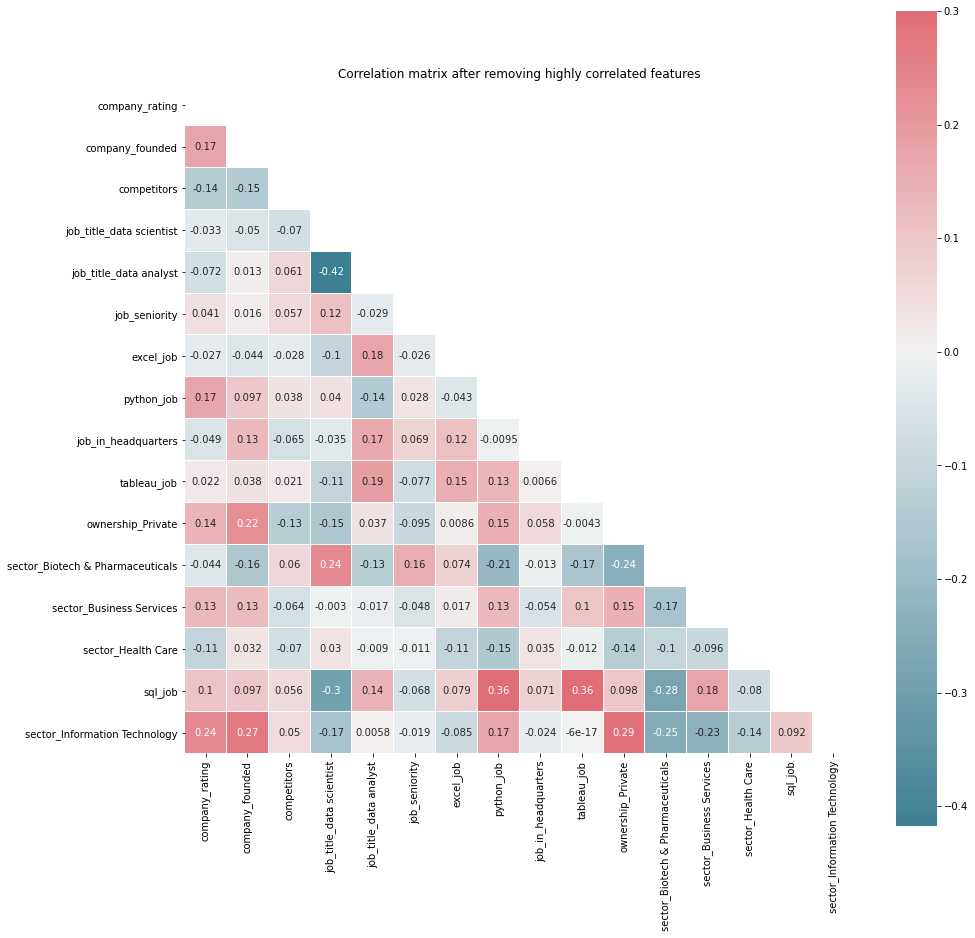

In [103]:
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = x.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [104]:
x.columns

Index(['company_rating', 'company_founded', 'competitors',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority',
       'excel_job', 'python_job', 'job_in_headquarters', 'tableau_job',
       'ownership_Private', 'sector_Biotech & Pharmaceuticals',
       'sector_Business Services', 'sector_Health Care', 'sql_job',
       'sector_Information Technology'],
      dtype='object')

In [105]:
# Rearranging the columns

x = x[['company_rating', 'company_founded', 'competitors',
        'sector_Health Care','sector_Business Services', 'sector_Information Technology',
       'ownership_Private', 'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

## Feature Scaling

In [106]:
x.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,3.8,1973.0,0,0,0,0,1,0,1,0,0,0,1,1,1,0
1,3.4,1984.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4.8,2010.0,0,0,1,0,1,0,1,0,0,1,1,1,0,1
3,3.8,1965.0,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2.9,1998.0,3,0,1,0,1,0,1,0,0,1,1,1,0,1


In [107]:
from sklearn.preprocessing import StandardScaler
x_prev = x.copy()

sc_rating = StandardScaler()
x['company_rating'] = sc_rating.fit_transform(x[['company_rating']])

sc_founded = StandardScaler()
x['company_founded'] = sc_founded.fit_transform(x[['company_founded']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


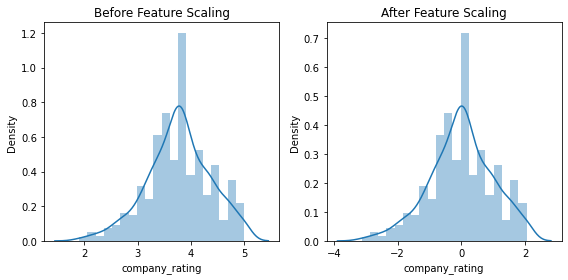

In [108]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=x_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=x['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

In [109]:
#Insight: Feature Scaling doesnot change the distribution of the data, it only reduces the scale of that particular feature.
x.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,0.048588,-0.086728,0,0,0,0,1,0,1,0,0,0,1,1,1,0
1,-0.620043,0.138799,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1.720165,0.671863,0,0,1,0,1,0,1,0,0,1,1,1,0,1
3,0.048588,-0.250748,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,-1.455831,0.425833,3,0,1,0,1,0,1,0,0,1,1,1,0,1


## Model Building

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr,x,y,cv=10,scoring='neg_root_mean_squared_error')
print('---Average NRMSE: {}---'.format(round(cv.mean(),3)))
print('Standard Deviation: {}'.format(round(cv.std(),3)))

---Average NRMSE: -27.523---
Standard Deviation: 2.307


In [112]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, x, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.993 ---
Standard Deviation: 1.796


In [113]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, x, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -17.848 ---
Standard Deviation: 5.387


In [114]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, x, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -24.434 ---
Standard Deviation: 2.495


Note: Random Forest & Gradient Boosting algorithms are selected amongst all the other algorithms because they have the highest value for Negative Root Mean Squared Error (NRMSE) i.e. lowest value for Root Mean Squared Error (RMSE) metric.

## Making Predictions

In [115]:
rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [116]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
  prediction_input.append(competitors)
  

  sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [117]:
salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 91535(USD) to 109535(USD) per annum.


In [118]:
salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 86350(USD) to 104350(USD) per annum.
